In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:\\Users\\Dell\\Desktop\\Balaji Fast Food Sales.csv")
df.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


### BASIC INFO ABOUT DATASET

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            1000 non-null   int64 
 1   date                1000 non-null   object
 2   item_name           1000 non-null   object
 3   item_type           1000 non-null   object
 4   item_price          1000 non-null   int64 
 5   quantity            1000 non-null   int64 
 6   transaction_amount  1000 non-null   int64 
 7   transaction_type    893 non-null    object
 8   received_by         1000 non-null   object
 9   time_of_sale        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


###

FINDING MISSING VALUES 

In [4]:


missing_values = df.isnull().sum()
print(missing_values)

order_id                0
date                    0
item_name               0
item_type               0
item_price              0
quantity                0
transaction_amount      0
transaction_type      107
received_by             0
time_of_sale            0
dtype: int64


In [5]:
df.date

0      07-03-2022
1       8/23/2022
2      11/20/2022
3      02-03-2023
4      10-02-2022
          ...    
995     3/19/2023
996     9/20/2022
997     1/26/2023
998     8/27/2022
999     5/29/2022
Name: date, Length: 1000, dtype: object


##  the transaction_type has 107 missing values

In [6]:
df.shape

(1000, 10)

In [7]:
#droping the order_idcolumn
df.drop('order_id', axis=1, inplace=True)


In [8]:
df.dtypes

date                  object
item_name             object
item_type             object
item_price             int64
quantity               int64
transaction_amount     int64
transaction_type      object
received_by           object
time_of_sale          object
dtype: object

### Changing Data Type; Dealing With The Missing Values

In [10]:
df['date'].unique()[:25]


array(['07-03-2022', '8/23/2022', '11/20/2022', '02-03-2023',
       '10-02-2022', '11/14/2022', '05-03-2022', '12/22/2022',
       '06-10-2022', '9/16/2022', '12-01-2022', '07-12-2022',
       '11/25/2022', '4/14/2022', '10/16/2022', '11-05-2022', '8/22/2022',
       '9/15/2022', '12/21/2022', '10-04-2022', '5/26/2022', '02-11-2023',
       '8/31/2022', '8/18/2022', '10-12-2022'], dtype=object)

In [11]:
#- Changing Data Type

df['date'] = df['date'].astype(str)
df['date'] = df['date'].str.replace('/', '-')
df['date'] = pd.to_datetime(df['date'], format='%m-%d-%Y', errors='coerce')
print(df.dtypes)

date                  datetime64[ns]
item_name                     object
item_type                     object
item_price                     int64
quantity                       int64
transaction_amount             int64
transaction_type              object
received_by                   object
time_of_sale                  object
dtype: object


In [12]:
# Dealing With The Missing Values

display(df['transaction_type'].unique())
display(df[df['transaction_type'].isnull()])
df['transaction_type'].fillna('Unknown', inplace = True)


display(df.isnull().sum().sort_values(ascending = False)) #no. of unknown values in each row

array([nan, 'Cash', 'Online'], dtype=object)

,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,2022-07-03,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
15,2022-04-14,Sandwich,Fastfood,60,11,660,NaN,Mrs.,Midnight
31,2022-05-06,Aalopuri,Fastfood,20,4,80,NaN,Mr.,Morning
40,2022-11-13,Cold coffee,Beverages,40,11,440,NaN,Mr.,Afternoon
46,2022-07-10,Sandwich,Fastfood,60,7,420,NaN,Mr.,Morning
...,...,...,...,...,...,...,...,...,...
987,2023-01-03,Frankie,Fastfood,50,13,650,NaN,Mrs.,Night
995,2023-03-19,Frankie,Fastfood,50,10,500,NaN,Mrs.,Evening
996,2022-09-20,Sandwich,Fastfood,60,7,420,NaN,Mr.,Evening
997,2023-01-26,Sandwich,Fastfood,60,13,780,NaN,Mr.,Evening


date                  0
item_name             0
item_type             0
item_price            0
quantity              0
transaction_amount    0
transaction_type      0
received_by           0
time_of_sale          0
dtype: int64

In [13]:
df

,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,2022-07-03,Aalopuri,Fastfood,20,13,260,Unknown,Mr.,Night
1,2022-08-23,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,2022-11-20,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,2023-02-03,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,2022-10-02,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening
...,...,...,...,...,...,...,...,...,...
995,2023-03-19,Frankie,Fastfood,50,10,500,Unknown,Mrs.,Evening
996,2022-09-20,Sandwich,Fastfood,60,7,420,Unknown,Mr.,Evening
997,2023-01-26,Sandwich,Fastfood,60,13,780,Unknown,Mr.,Evening
998,2022-08-27,Panipuri,Fastfood,20,5,100,Unknown,Mrs.,Afternoon


In [14]:
df.item_name.nunique()

7

###  

Find Duplications And Analyse Them:

In [15]:
# Find Duplications And Analyse Them:

print(df.duplicated().sum())

0


In [16]:
#No duplicates found

### decriptive stats

In [35]:


display(df.describe())
print('-'*80)
display(df.describe(include = 'object'))
print('-'*80)
display(df[['date']].agg(['min','max']))



,date,item_price,quantity,transaction_amount
count,1000,1000.000000,1000.000000,1000.000000
mean,2022-10-03 14:39:50.400000,33.315000,8.162000,275.230000
min,2022-04-01 00:00:00,20.000000,1.000000,20.000000
25%,2022-07-04 00:00:00,20.000000,4.000000,120.000000
50%,2022-10-07 12:00:00,25.000000,8.000000,240.000000
75%,2023-01-02 00:00:00,50.000000,12.000000,360.000000
max,2023-03-30 00:00:00,60.000000,15.000000,900.000000
std,NaN,14.921744,4.413075,204.402979


--------------------------------------------------------------------------------


,item_name,item_type,transaction_type,received_by,time_of_sale
count,1000,1000,1000,1000,1000
unique,7,2,3,2,5
top,Cold coffee,Fastfood,Cash,Mr.,Night
freq,161,686,476,512,205


--------------------------------------------------------------------------------


,date
min,2022-04-01
max,2023-03-30


### OBSERVATIONS:

#The data contains values in a financial year from 01/04/2022 to 30/03/2023.

#The cheapest item is 20 and the most expensive item is 60

#The least spent on a transaction is 20 and the most spent is 900

#The least quantity sold per transaction is 1 and the most quantity sold is 15.


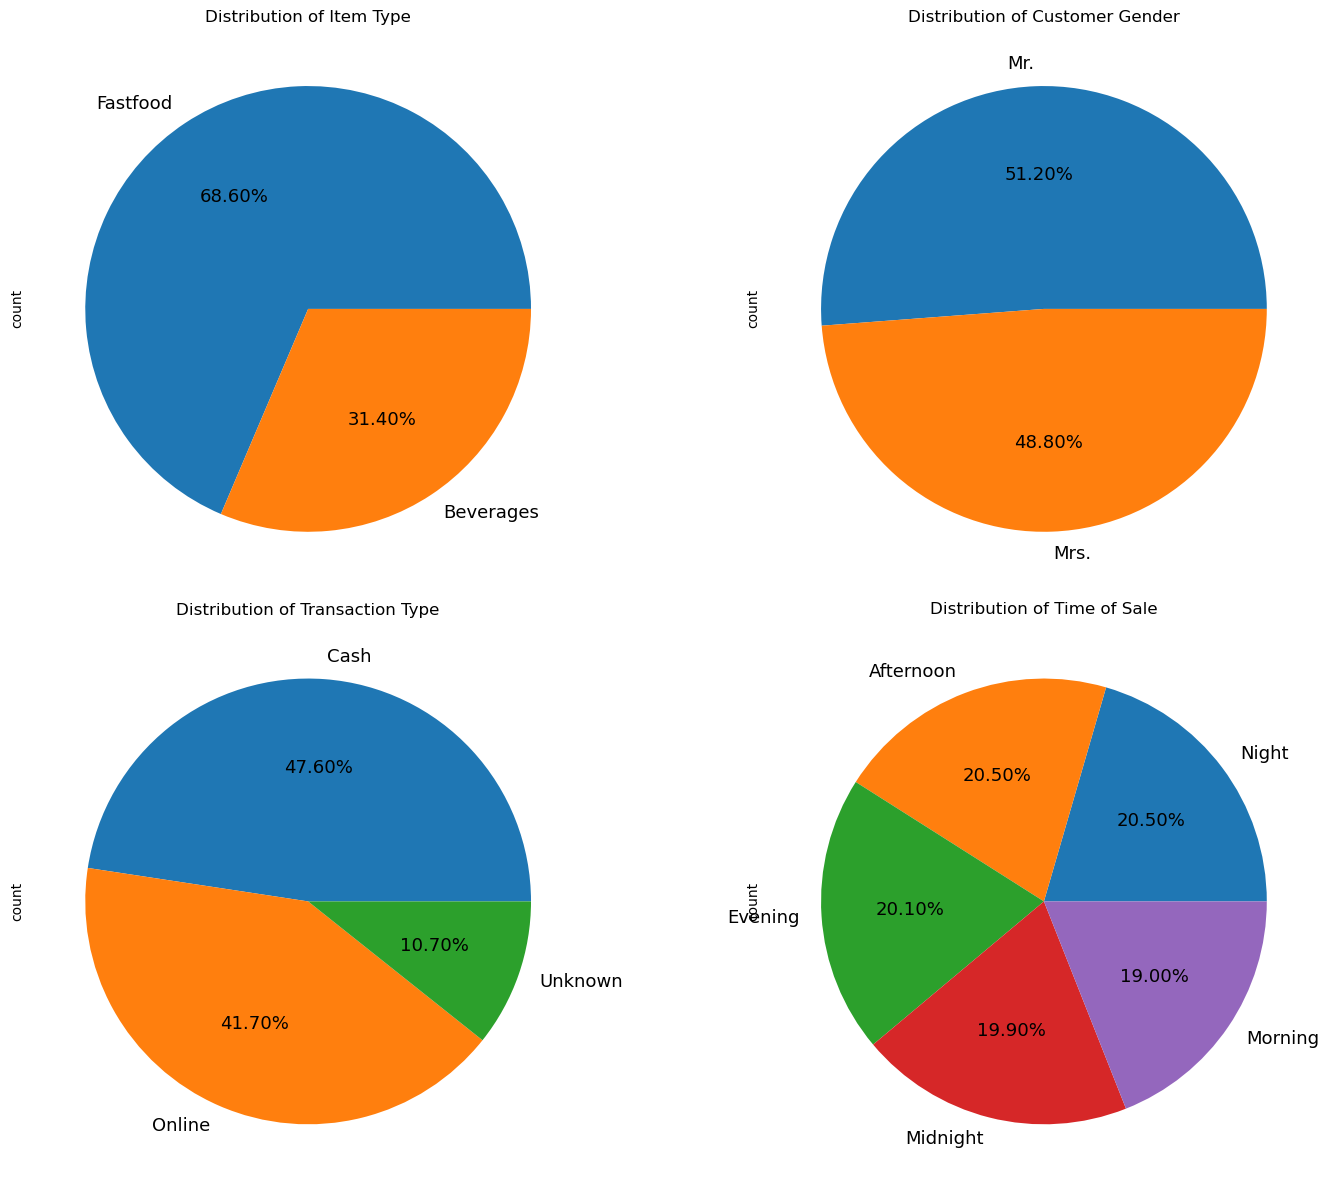

In [37]:
#Visualization some values

fig, ax = plt.subplots(2, 2, figsize = (15,12)) 

df['item_type'].value_counts().plot(kind='pie', autopct='%.2f%%', fontsize=13, ax=ax[0, 0], title='Distribution of Item Type'); ax[0, 0]

df['received_by'].value_counts().plot(kind='pie', autopct='%.2f%%', fontsize=13, ax=ax[0, 1], title='Distribution of Customer Gender'); ax[0, 1]

df['transaction_type'].value_counts().plot(kind='pie', autopct='%.2f%%', fontsize=13, ax=ax[1, 0] , title='Distribution of Transaction Type'); ax[1, 0]
df['time_of_sale'].value_counts().plot(kind='pie', autopct='%.2f%%', fontsize=13, ax=ax[1, 1],  title='Distribution of Time of Sale'); ax[1, 1]


plt.tight_layout()
plt.show()

### OBSERVATIONS:

#FastFood and Beverages are quite unbalanced => separate into 2 subjects to study easily

#Gender in this dataset is almost equal

#Except 10.7% is unknown transaction type, Cash and Online are not quite an imbalance in this dataset

#Distribution of time of sale is almost equal with 20% per category



### COUNT 

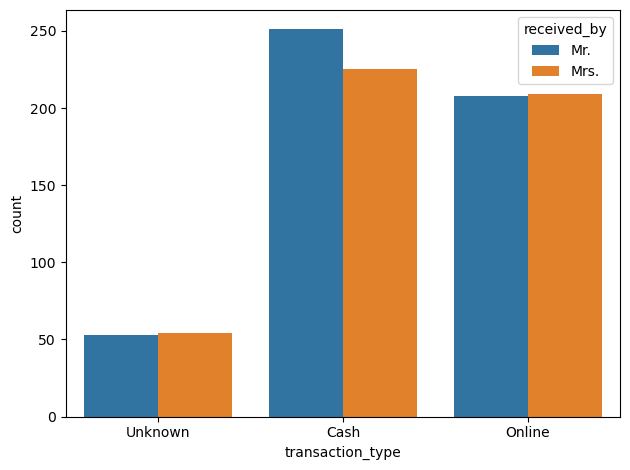

In [21]:
sns.countplot(data = df, x= 'transaction_type', hue = 'received_by')
plt.tight_layout()
plt.show();

### Observation: Overall, Customers prefer cash over online

In [38]:
list_price = df[['item_name', 'item_price', 'item_type']]\
              .sort_values(by='item_type', ascending=False)\
              .drop_duplicates().reset_index(drop=True)

print('Price list of items:')
display(list_price[['item_name', 'item_price']].T)

Price list of items:


,0,1,2,3,4,5,6
item_name,Aalopuri,Frankie,Vadapav,Sandwich,Panipuri,Sugarcane juice,Cold coffee
item_price,20,50,20,60,20,25,40


In [39]:
quantity = df[['item_name', 'quantity', 'item_type', 'transaction_amount']]\
            .groupby(['item_name', 'item_type'])\
            .agg({'quantity': sum, 'transaction_amount': sum})\
            .sort_values(by='quantity', ascending=False)\
            .reset_index()


In [40]:
quantity_M = list_price.merge(quantity, how='inner', on='item_name')

In [42]:
quantity_F = quantity_M[quantity_M['item_type_x'] == 'Fastfood'][['item_name', 'item_price', 'quantity', 'transaction_amount']]

quantity_B = quantity_M[quantity_M['item_type_x'] == 'Beverages'][['item_name', 'item_price', 'quantity', 'transaction_amount']]

Text(0.5, 1.0, 'Quantity and Revenue of Beverages')

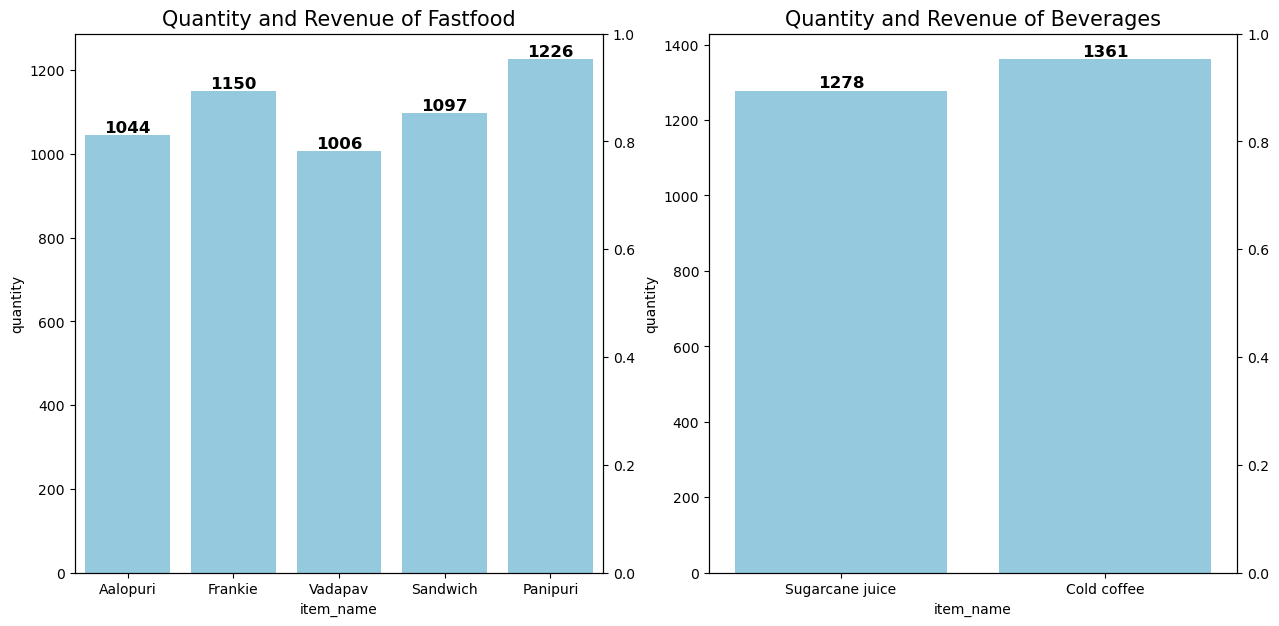

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

ax[0] = sns.barplot(data=quantity_F, x='item_name', y='quantity', ax=ax[0], color='skyblue')
ax[0].bar_label(ax[0].containers[0], label_type='edge', fontweight='bold', fontsize=12)
ax2 = ax[0].twinx()
ax[0].set_title('Quantity and Revenue of Fastfood', size=15)


ax[1] = sns.barplot(data=quantity_B, x='item_name', y='quantity', ax=ax[1], color='skyblue')
ax[1].bar_label(ax[1].containers[0], label_type='edge', fontweight='bold', fontsize=12)
ax3 = ax[1].twinx()
ax[1].set_title('Quantity and Revenue of Beverages', size=15)

### observations
for fast foods


- Aalopuri, Vadapav, and Panipuri all have the same selling price of 20 each, however, Panipuri has the highest consumption with 1226 pieces and 
  is the most among the dishes

- The most expensive sandwich is 60 each, with the number of purchases ranking 3rd

- Frankie ranks 2nd in both selling prices 50 each and consumption with 1150 pieces

- Although it has the highest sales, Panipuri only ranks 3rd in revenue, the highest revenue comes from Sandwich 


For Beverages:



- The selling price of Cold coffee is 40 each, which is quite high compared to Sugarcane juice, which is 25 each

- However, the number of Cold coffee sold (1361) is much higher than Sugarcane juice (1278)

- Cold coffee also brings in much more revenue than Sugarcane juice 


In [44]:

# Calculate item quantities and transaction amounts
item_quantity = df.groupby(['item_name', 'received_by', 'item_type']).agg({
    'quantity': 'sum',
    'transaction_amount': 'sum'
}).reset_index().rename(columns={'received_by': 'gender'})


In [45]:
# Define a function to create bar and point plots
def create_plot(data, ax, title):
    bar_plot = sns.barplot(data=data, x='item_name', y='quantity', color='#A77352', hue='gender', ax=ax)
    ax2 = ax.twinx()
    point_plot = sns.pointplot(data=data, x='item_name', y='transaction_amount', ax=ax2, 
                               linestyles='None', hue='gender', markers=['o', 's'], palette=['blue', 'orange'])
    
    # Adding data labels to bars
    for container in bar_plot.containers:
        bar_plot.bar_label(container, label_type='edge', fontweight='bold', fontsize=12)

    ax.set_title(title, size=15)
    
    ax.set_ylabel('Quantity')
    ax2.set_ylabel('Revenue')

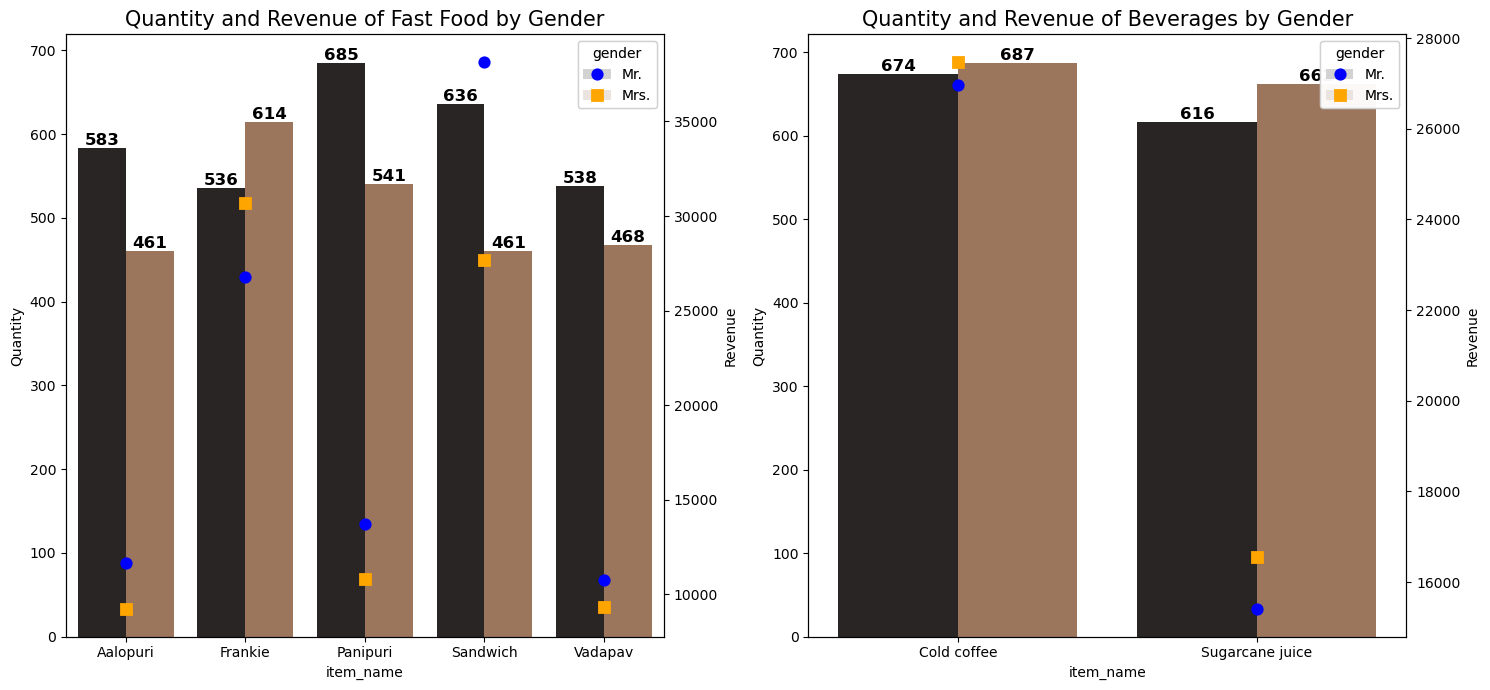

In [46]:
# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Fastfood plot
create_plot(item_quantity[item_quantity['item_type'] == 'Fastfood'], ax[0], 'Quantity and Revenue of Fast Food by Gender')

# Beverages plot
create_plot(item_quantity[item_quantity['item_type'] == 'Beverages'], ax[1], 'Quantity and Revenue of Beverages by Gender')

plt.tight_layout()
plt.show()

# For Fastfood:

 When the Men are handling the transaction, customers preferred to order Panipuri with 685 pieces sold, followed by Sandwich with 636 pieces
 
 When the Women are handling the transaction, customers preferred Frankie with 614 pieces sold, Panipuri was their second choice with 541 pieces

## For Beverages 

Customers always prefer Cold coffee, whether Men or Women are handling the transaction, even though the price is much higher than Sugarcane juice. 
This also makes the revenue from Cold coffee much higher than that from Sugarcane juice.

In [47]:
quantity_by_type_by_time_of_sale = df[['item_name','quantity','received_by','time_of_sale', 'item_type']].\
                                    groupby(['time_of_sale', 'item_type']).\
                                    agg({'quantity': sum}).reset_index().rename(columns = {'received_by' : 'gender'})

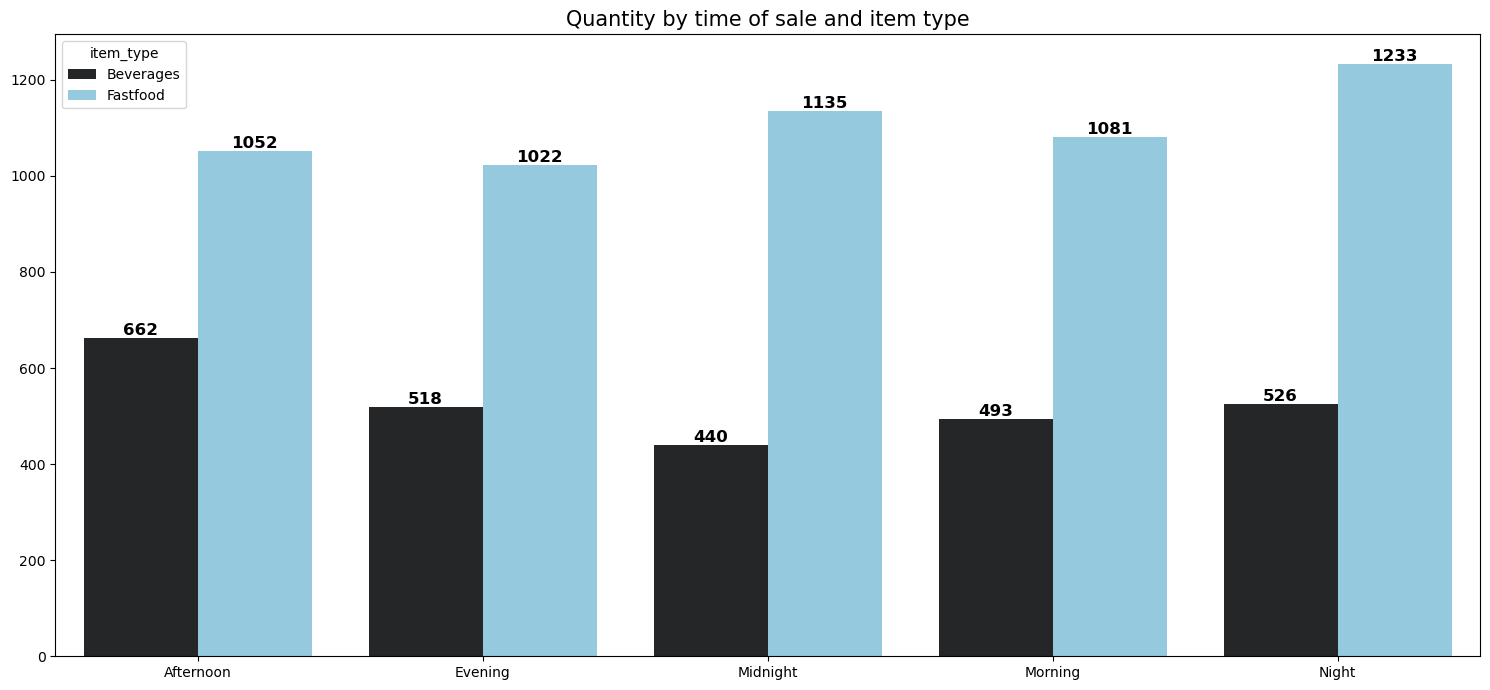

In [48]:
fig, ax = plt.subplots(figsize = (15,7))
ax = sns.barplot(data = quantity_by_type_by_time_of_sale, x = 'time_of_sale', y = 'quantity', \
                         hue = 'item_type', color = 'skyblue', ax = ax)
ax.bar_label(ax.containers[0], label_type= 'edge', fontweight = 'bold', fontsize = 12)
ax.bar_label(ax.containers[1], label_type= 'edge', fontweight = 'bold', fontsize = 12)

ax.set_title('Quantity by time of sale and item type', size = 15)
ax.set_xlabel('')
ax.set_ylabel('')

plt.tight_layout()
plt.show();

 Observation:

-Most customers come to eat more than drink

-The time when customers eat the most is at Night and Midnight

-The time when customers drink the most is in the Afternoon

In [49]:
# Group data by 'time_of_sale' and 'received_by', then aggregate the quantity
quantity_by_gender_by_time_of_sale = (
    df[['item_name', 'quantity', 'received_by', 'time_of_sale', 'item_type']]
    .groupby(['time_of_sale', 'received_by'])
    .agg({'quantity': sum})
    .reset_index()
    .rename(columns={'received_by': 'gender'})
)

Text(0.5, 1.0, 'Quantity by Time of Sale and Gender')

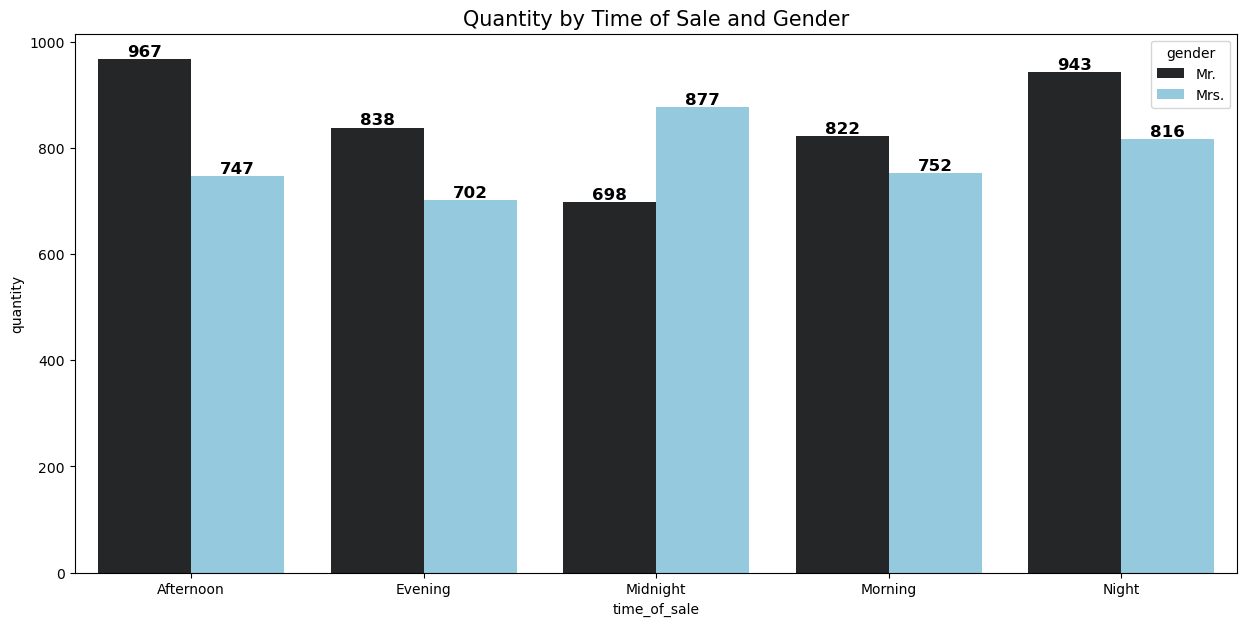

In [50]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(15, 7))

# Plot bar chart with hue for gender
sns.barplot(
    data=quantity_by_gender_by_time_of_sale, 
    x='time_of_sale', 
    y='quantity', 
    hue='gender', 
    ax=ax, 
    color='skyblue'
)
# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontweight='bold', fontsize=12)

ax.set_title('Quantity by Time of Sale and Gender', size=15)

Observation:

-Sales, when Men handle the transaction, are highest in the Afternoon and at Night

-Sales, when Women handle the transaction, are highest at Midnight and at Night

In [32]:
Revenue_by_type_by_time_of_sale = df[['transaction_amount', 'time_of_sale', 'item_type']]\
                                    .groupby(['time_of_sale', 'item_type'])\
                                    .agg({'transaction_amount': sum}).reset_index()

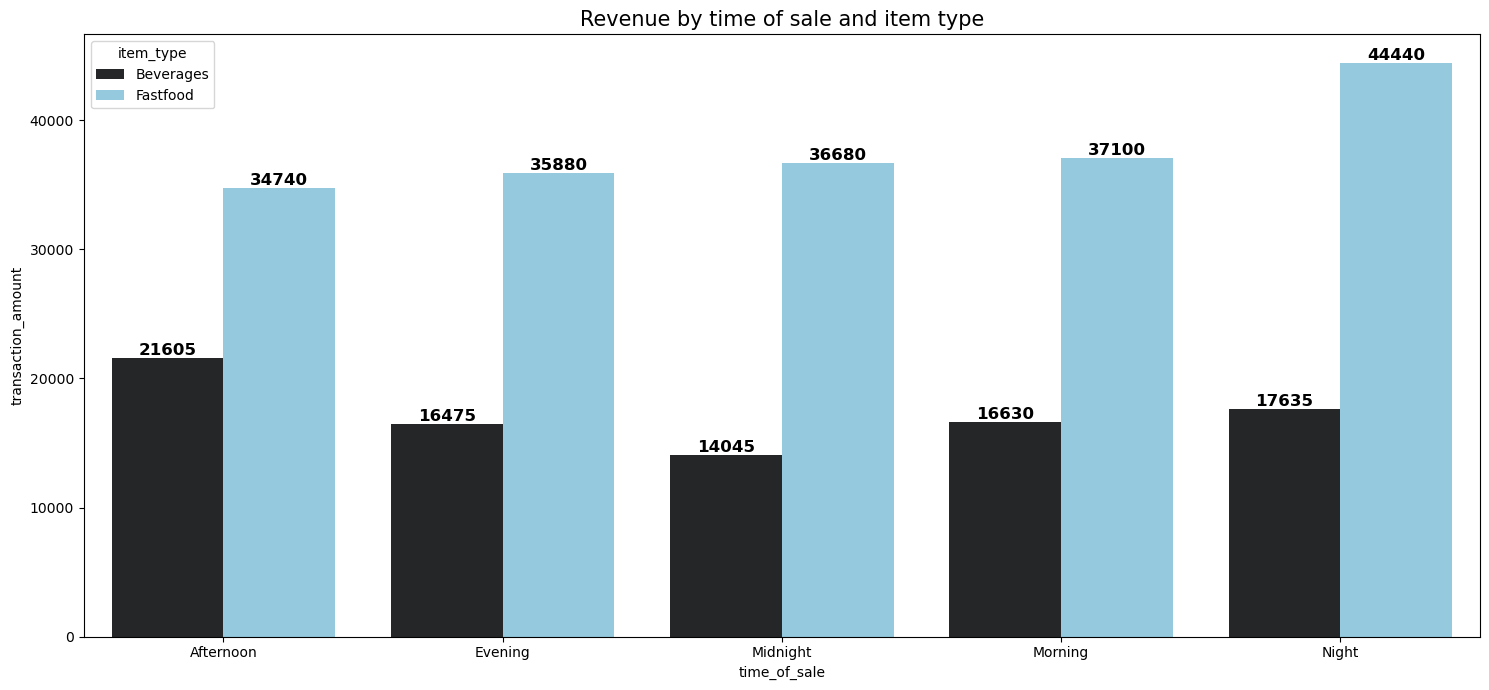

In [33]:
fig, ax = plt.subplots(figsize=(15, 7))
ax = sns.barplot(data=Revenue_by_type_by_time_of_sale, x='time_of_sale', y='transaction_amount', \
                 hue='item_type', color='skyblue', ax=ax)

ax.bar_label(ax.containers[0], label_type='edge', fontweight='bold', fontsize=12)

ax.bar_label(ax.containers[1], label_type='edge', fontweight='bold', fontsize=12)
ax.set_title('Revenue by time of sale and item type', size=15)
plt.tight_layout()
plt.show()

Observation:
1. For Fastfood:

- The highest revenue on Night was 44440
- The lowest revenue in the Afternoon was 34740

2. For Beverages:

- The highest revenue in the Afternoon was 21605
- The lowest revenue on Midnight was 14045

# Histogram

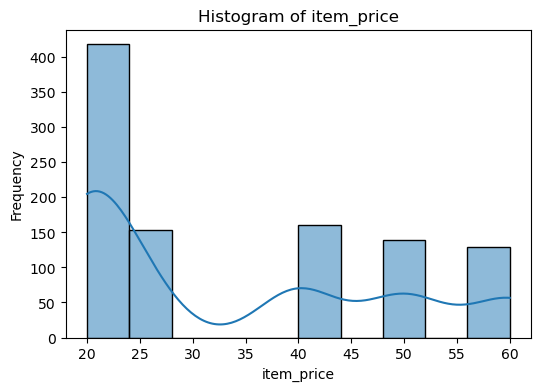

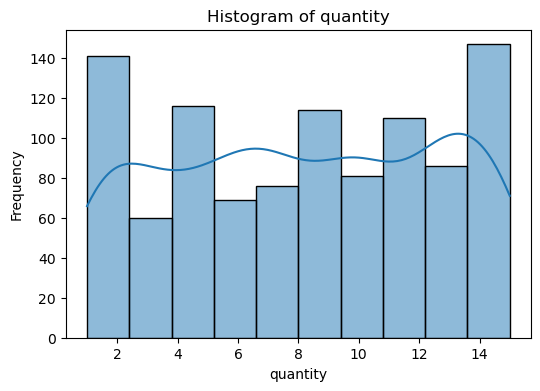

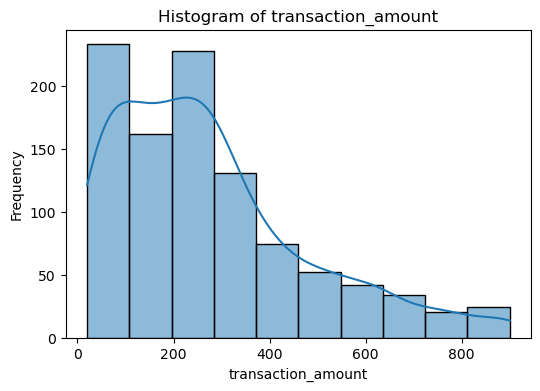

In [68]:
numeric_columns = ['item_price', 'quantity', 'transaction_amount']

# Plot histograms
for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[column], kde=True, bins=10)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

## Conclusion 
From the histograms provided:

-Item Price: The histogram shows a concentration of fast food items priced around 20-25, with a gradual decrease in frequency as the price increases. 
The distribution is skewed to the right, indicating that lower-priced items are sold more frequently than higher-priced ones.

-Quantity: The quantities ordered are fairly evenly distributed across different levels, with a slight peak at 14. There is no clear pattern, but it suggests variability in customer purchases,
with orders spread across small to larger quantities.

-Transaction Amount: The distribution of transaction amounts is also right-skewed, meaning most transactions occur in the lower range (between 0 and 200),with fewer transactions reachin
higher amounts (above 400). This could be indicative of many small purchases, which is typical for fast food outlets.

Overall, the dataset shows a pattern where lower-priced items and smaller transactions are more common, but there is diversity in the quantity ordered.

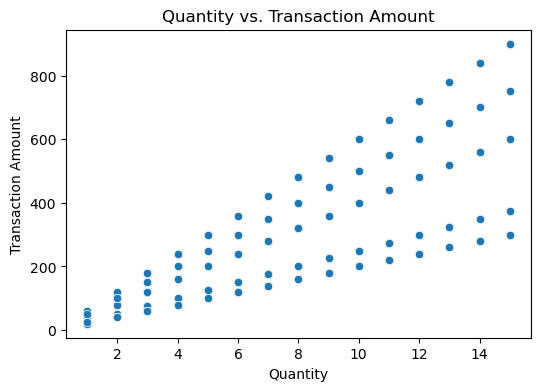

In [72]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='quantity', y='transaction_amount')
plt.title('Quantity vs. Transaction Amount')
plt.xlabel('Quantity')
plt.ylabel('Transaction Amount')
plt.show()


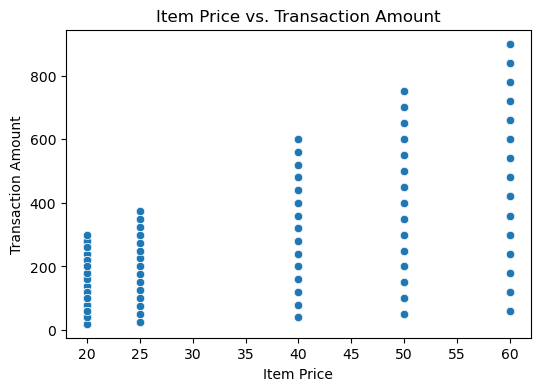

In [73]:
# Scatter plot: Item Price vs. Transaction Amount
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='item_price', y='transaction_amount')
plt.title('Item Price vs. Transaction Amount')
plt.xlabel('Item Price')
plt.ylabel('Transaction Amount')
plt.show()

## Conclusion:
Both scatter plots confirm that quantity and item price are positively correlated with the transaction amount. Increases in either factor lead to higher transaction values.


# Box plots 

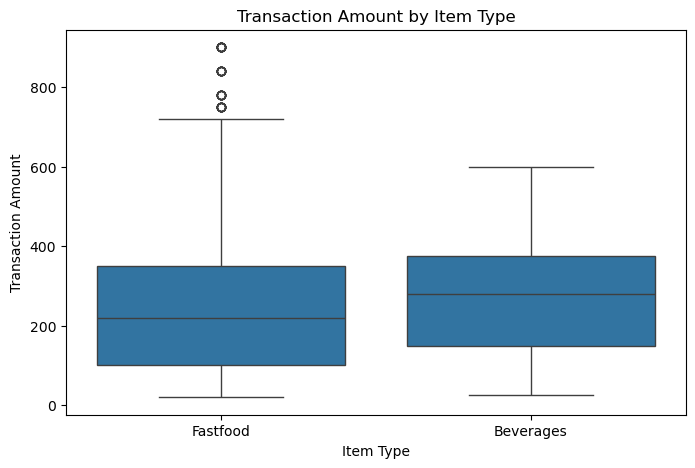

In [74]:
# Box plot for transaction amount by item type
plt.figure(figsize=(8, 5))
sns.boxplot(x='item_type', y='transaction_amount', data=df)
plt.title('Transaction Amount by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Transaction Amount')
plt.show()

# 
Overall, while Fastfood transactions show some outliers on the higher end,
the typical transaction amounts for both Fastfood and Beverages are fairly comparable, with the median for Fastfood slightly exceeding that of Beverages.

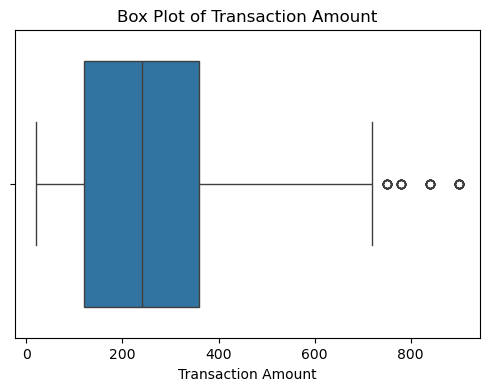

In [76]:
# Box plot for transaction amount
plt.figure(figsize=(6, 4))
sns.boxplot(x='transaction_amount', data=df)
plt.title('Box Plot of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.show()

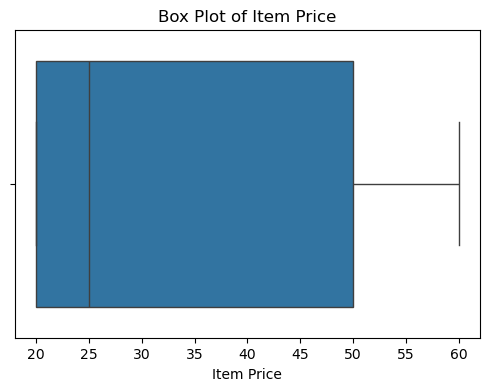

In [77]:
# Box plot for item price
plt.figure(figsize=(6, 4))
sns.boxplot(x='item_price', data=df)
plt.title('Box Plot of Item Price')
plt.xlabel('Item Price')
plt.show()

# HEATMAPS 

### Transaction Amount by Time of Sale:


to Visualize how the transaction amounts vary by the time of sale (e.g., Morning, Afternoon, Evening, Night.

In [59]:
# Create a pivot table for total transaction amount by time of sale
pivot_table_transaction = df.pivot_table(values='transaction_amount', index='item_type', columns='time_of_sale', aggfunc='sum', fill_value=0)



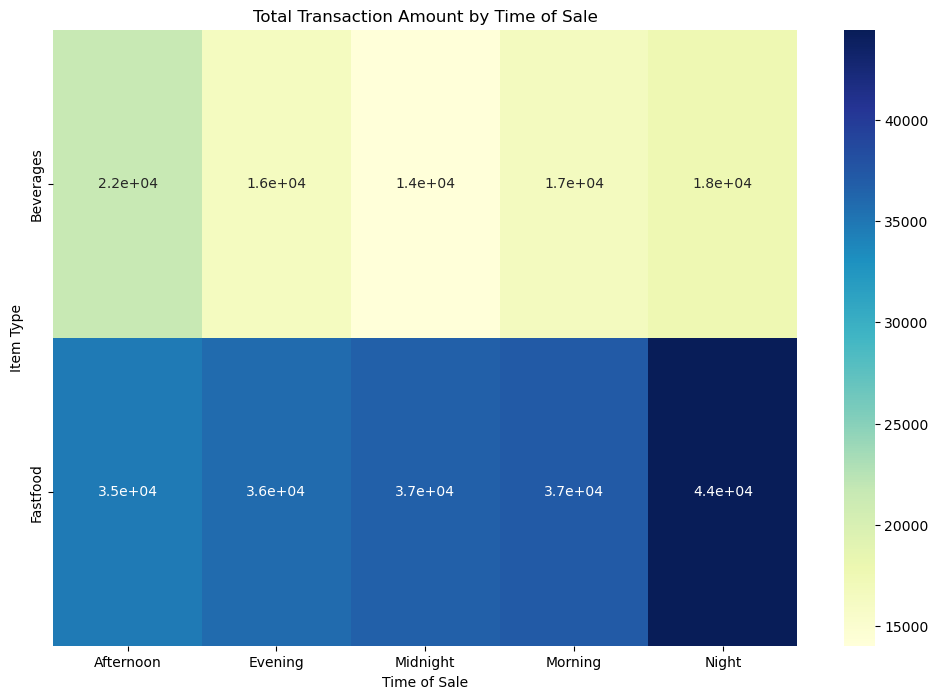

In [60]:
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_transaction, annot=True, cmap='YlGnBu')
plt.title('Total Transaction Amount by Time of Sale')
plt.xlabel('Time of Sale')
plt.ylabel('Item Type')
plt.show()

### 

Transaction Amounts by Item Type:

Fastfood generally generates a higher total transaction amount compared to Beverages across all time periods.
The highest transaction amount for Fastfood is observed during the Night (approximately 44,000), while the lowest is during the Afternoon (about 35,000).
Beverages Performance:

The total transaction amounts for Beverages are significantly lower than for Fastfood, with the highest amount recorded during the Afternoon (approximately 22,000) and the lowest during Midnight (about 16,000).
Trends Over Time:

For Fastfood, there is a noticeable increase in transaction amounts from the Afternoon to Night, indicating that sales of Fastfood peak during the later hours.
In contrast, Beverage sales do not exhibit a similar trend, showing relatively consistent performance throughout the day, but lower overall sales compared to Fastfood.
# Overall Interpretation
The analysis suggests that Fastfood consistently outperforms Beverages in terms of transaction amounts across all time periods. 
This information could be valuable for business strategies, such as promotional efforts and inventory management, focusing on increasing beverage sales during peak Fastfood hours or enhancing the beverage offerings to attract more customers during those periods. The data indicates a potential opportunity to boost beverage sales, especially during times when Fastfood sales are high, by cross-promoting or bundling products.

# STATISTICAL TESTS 

# correlation analysis 


Correlation Matrix:
                     item_price  quantity  transaction_amount
item_price            1.000000  0.050361            0.637238
quantity              0.050361  1.000000            0.731806
transaction_amount    0.637238  0.731806            1.000000


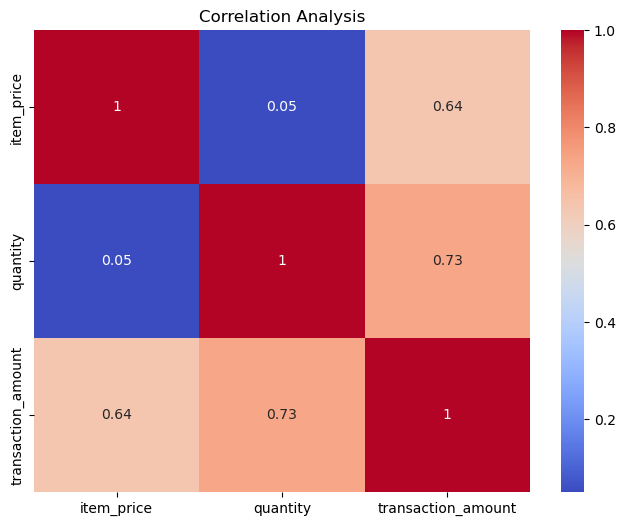

In [78]:
correlation_matrix = df[['item_price', 'quantity', 'transaction_amount']].corr()

# Step 4: Display the Correlation Matrix
print("Correlation Matrix:\n", correlation_matrix)

# Step 5: Visualize the Correlation Matrix using a Heatmap
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Analysis')
plt.show()

## Overall Summary:
-The transaction_amount is strongly influenced by both item_price and quantity, but the strongest relationship is with quantity. 

-Thus, focusing on increasing the quantity sold would have a significant impact on overall sales revenue.
The item_price does not significantly affect the quantity sold, suggesting that customers are not highly sensitive to changes in item prices within this dataset.

# CHI SQUARE TEST 

### Association between Item Type and Quantity Categories

In [52]:
quantity_M['quantity_category'] = pd.cut(quantity_M['quantity'], bins=[0, 50, 100, float('inf')], labels=['Low', 'Medium', 'High'])

In [53]:
contingency_table = pd.crosstab(quantity_M['item_type_x'], quantity_M['quantity_category'])
print(contingency_table)

quantity_category  High
item_type_x            
Beverages             2
Fastfood              5


In [55]:
from scipy.stats import chi2_contingency

chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_val}")

Chi-Square Statistic: 0.0
P-Value: 1.0


### Conclusion 
There is no significant association between item_type (Fastfood vs. Beverages) and quantity categories (p = 1, Chi-square = 0).
The data suggests that the distribution of quantities sold (low, medium, or high) is identical for both Fastfood and Beverages. This means the type of item does not affect the number of items sold."

### Association between Item Type and Transaction Amount Categories

In [56]:
quantity_M['transaction_category'] = pd.cut(quantity_M['transaction_amount'], bins=[0, 500, 1000, float('inf')], labels=['Low', 'Medium', 'High'])

In [57]:
contingency_table_2 = pd.crosstab(quantity_M['item_type_x'], quantity_M['transaction_category'])
print(contingency_table_2)

transaction_category  High
item_type_x               
Beverages                2
Fastfood                 5


In [58]:
chi2_stat_2, p_val_2, dof_2, ex_2 = chi2_contingency(contingency_table_2)

print(f"Chi-Square Statistic: {chi2_stat_2}")
print(f"P-Value: {p_val_2}")

Chi-Square Statistic: 0.0
P-Value: 1.0


## 
The analysis reveals that there is no significant association between item_type (Fastfood vs. Beverages) and the quantity of items sold (p = 1, Chi-square = 0). The identical distribution of quantities across the categories suggests that the type of item sold does not influence the number of items sold in any meaningful way. 
Therefore, both Fastfood and Beverages exhibit similar sales patterns regarding the quantity sold."

# T test 

In [81]:
# Filter the data by `item_type`
from scipy.stats import ttest_ind
fastfood_quantity = df[df['item_type'] == 'Fastfood']['quantity']
beverages_quantity = df[df['item_type'] == 'Beverages']['quantity']



In [82]:
# Perform an independent two-sample t-test
t_stat, p_value = ttest_ind(fastfood_quantity, beverages_quantity)

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -1.175660973535336
P-value: 0.24001076332310506


## Interpretation:
The observed difference in quantities sold between Fastfood and Beverages is likely due to random chance rather than a true difference in sales patterns.
Therefore, from a statistical standpoint, we cannot conclude that one category (Fastfood or Beverages) consistently sells in higher or lower quantities compared to the other.

# ANOVA Analysis

In [65]:
import pandas as pd
from scipy import stats

# Load the dataset
df = pd.read_csv("C:\\Users\\Dell\\Desktop\\Balaji Fast Food Sales.csv")


In [66]:
# Extract transaction amounts for each item type
fastfood_transaction_amounts = df[df['item_type'] == 'Fastfood']['transaction_amount']
beverages_transaction_amounts = df[df['item_type'] == 'Beverages']['transaction_amount']


In [67]:
# Perform ANOVA
f_statistic, p_value = stats.f_oneway(fastfood_transaction_amounts, beverages_transaction_amounts)

# Print the results
print(f"F-Statistic: {f_statistic}, P-Value: {p_value}")

F-Statistic: 0.00011523594593417926, P-Value: 0.9914371781892507


## Conclusion
Based on the results of the ANOVA test, we obtained the following values:

F-Statistic: 0.000115
P-Value: 0.9914
Interpretation:
P-Value:

-The p-value of 0.9914 is significantly higher than the common alpha level of 0.05. This indicates that there is no statistically significant difference in the average transaction amounts between the Fastfood and Beverages item types.
F-Statistic:

-The F-statistic is extremely low (0.000115), suggesting that the variability between the group means (Fastfood and Beverages) is very close to the variability within the groups. This reinforces the conclusion that the means of the two groups are nearly identical.

## Overall Conclusion:
-The analysis indicates that the average transaction amounts for Fastfood and Beverages are not significantly different from one another. This may suggest that customer spending is relatively consistent across these two item types, and any differences in sales can be attributed to other factors not examined in this analysis.

-Further investigations could involve looking into other categorical variables (like time of sale or received by) to explore if there are significant differences in transaction amounts influenced by these factors. 
Additionally, conducting a larger study or considering other item types could provide more comprehensive insights into customer behavior.

# Final Report: Analysis of Fast Food Sales Data
## Overview
This report summarizes the statistical analysis performed on the sales data of Fastfood and Beverages. Various tests, including ANOVA and t-tests,etc  
were conducted to examine transaction amounts and quantities sold, alongside insights into transaction patterns over time.

Key Findings
Transaction Amount Analysis:

-ANOVA Results:
F-Statistic: 0.000115
P-Value: 0.9914
Conclusion: No significant difference in average transaction amounts between Fastfood and Beverages. Customer spending appears consistent across both categories.
Quantity Sold Analysis:

-T-test Results:
P-Value: 0.240
Conclusion: No significant difference in the quantity sold between Fastfood and Beverages. Chi-square analysis confirmed identical distribution across categories.
Relationship Between Variables:

-Correlation Analysis:
Transaction amounts are strongly influenced by quantity sold, indicating that increasing quantity will significantly boost sales revenue.
Item price does not greatly affect quantity sold, suggesting limited price sensitivity.
Transaction Patterns Over Time:

Fastfood generates higher transaction amounts than Beverages across all time periods, with peak sales during the Night.
Opportunity for Growth: Implementing cross-promotions or bundling strategies could enhance Beverage sales during peak Fastfood hours.
    
Strategic Recommendations-
    
-Increase Quantity Sold: Focus on strategies to boost the number of items sold, as this has the most considerable impact on transaction amounts.
-Explore Additional Variables: Analyze other categorical variables such as time_of_sale, transaction_type, and received_by to uncover further insights into sales patterns.
-Targeted Promotions for Beverages: Develop promotional strategies or product bundles for Beverages during high Fastfood sales periods to balance overall sales performance.
Menu Optimization: Consider introducing new items or adjusting existing ones to differentiate between Fastfood and Beverages, given their similar transaction amounts and sales patterns.


# Conclusion
The analysis reveals that while Fastfood consistently outperforms Beverages in transaction amounts, customer spending is relatively stable across both categories.
    
By focusing on quantity sold and optimizing sales strategies, the business can leverage current strengths and enhance overall performance. 
    
Further research into customer preferences and behavior could yield even more valuable insights.